In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Загрузка данных
df = pd.read_csv('../test_data.csv', parse_dates=['date'])

# 2. Создание признаков
df['dayofweek'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['rolling_mean_7'] = df['price'].rolling(window=7).mean()
df['rolling_mean_14'] = df['price'].rolling(window=14).mean()
df['rolling_mean_30'] = df['price'].rolling(window=30).mean()
df['trend_7'] = df['price'] - df['rolling_mean_7']
df['trend_14'] = df['price'] - df['rolling_mean_14']

# 3. Удалим первые 30 дней (из-за скользящих окон)
df = df.dropna()

# 4. Формируем выборки
features = ['dayofweek', 'month', 'rolling_mean_7', 'rolling_mean_14', 'rolling_mean_30', 'trend_7', 'trend_14']
X = df[features]
y = df['price']

# 5. Делим на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 6. Обучаем модель
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 7. Предсказания
predictions = rf_model.predict(X_test)

# 8. Оценка
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"📉 MAE: {mae:.2f}")
print(f"📉 RMSE: {rmse:.2f}")


📉 MAE: 23.86
📉 RMSE: 35.94


📉 MAE: 4.94
📉 RMSE: 9.51


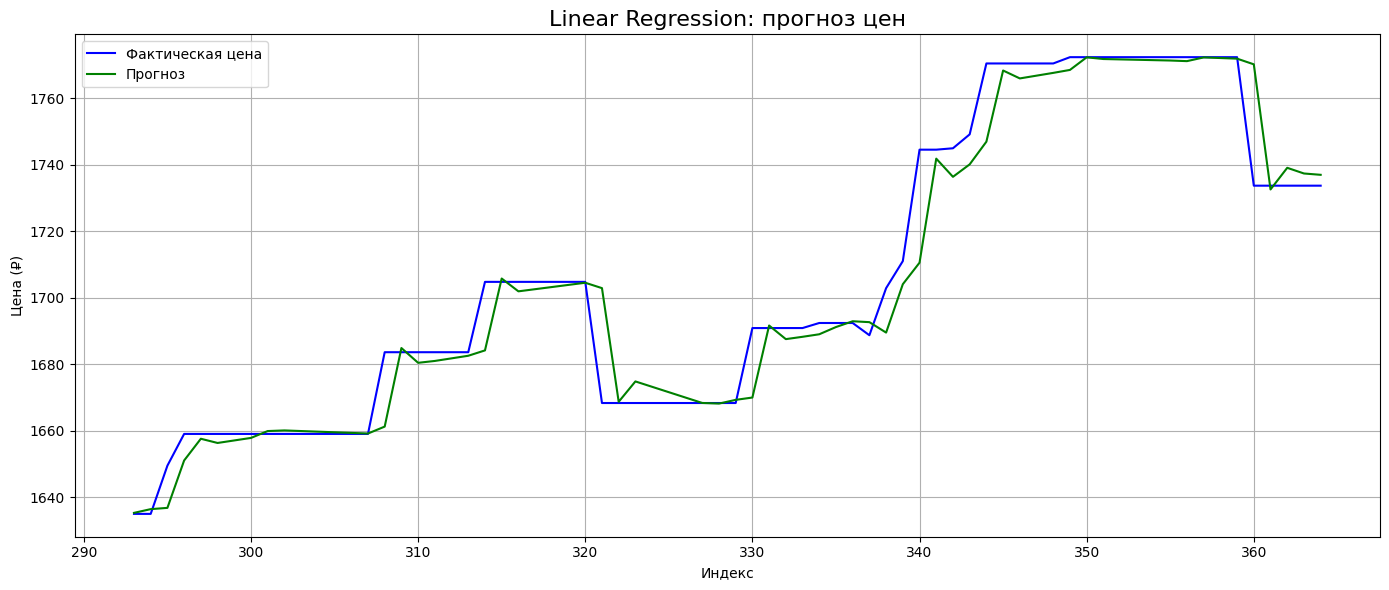

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Загрузка данных
df = pd.read_csv('../test_data.csv', parse_dates=['date'])

# 2. Признаки
df['dayofweek'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['rolling_mean_7'] = df['price'].rolling(window=7).mean()
df['price_shift_1'] = df['price'].shift(1)
df['price_shift_2'] = df['price'].shift(2)

# 3. Удалим строки с NaN (из-за rolling/shift)
df = df.dropna()

# 4. Формируем выборки
features = ['dayofweek', 'month', 'rolling_mean_7', 'price_shift_1', 'price_shift_2']
X = df[features]
y = df['price']

# 5. Делим на train/test (без перемешивания!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 6. Модель
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Предсказание
predictions = model.predict(X_test)

# 8. Оценка
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"📉 MAE: {mae:.2f}")
print(f"📉 RMSE: {rmse:.2f}")

# 9. Визуализация
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test.values, label='Фактическая цена', color='blue')
plt.plot(y_test.index, predictions, label='Прогноз', color='green')
plt.title('Linear Regression: прогноз цен', fontsize=16)
plt.xlabel('Индекс')
plt.ylabel('Цена (₽)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Модель LinearRegression показала лучшие результаты; МАЕ: 4.94 и RMAE: 9.51;
Значит моделью в среднем допускается ошибка в 5–10 ₽ — это менее 1% от стоимости
http://127.0.0.1:5000/predict-price?horizon=7 - ссылка для перехода после запуска app.py


In [10]:
import joblib

joblib.dump(model, '../models/linear_regression_model_2.joblib')

print("Модель успешно сохранена!")


Модель успешно сохранена!
